### StyleGAN2-ada-pytorch 모델 사용

* git clone https://github.com/NVlabs/stylegan2-ada-pytorch
* 터미널에서 명령어 실행
* 필요 라이브러리 설치 pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

In [2]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...


In [6]:
!conda install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

Channels:
 - defaults
 - conda-forge
 - anaconda
Platform: win-64
Solving environment: ...working... failed


C:\Users\user\MiniConda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'conda.anaconda.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
C:\Users\user\MiniConda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'conda.anaconda.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(

PackagesNotFoundError: The following packages are not available from current channels:

  - pyspng

Current channels:

  - defaults
  - https://conda.anaconda.org/conda-forge/noarch
  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/anaconda/win-64

To search for alternate channels that may provide the conda package you're
looking fo

In [1]:
# stylegan2-ada-pytorch 폴더로 이동
!cd 'D:\project\GAN\3. styleGAN2-ada-pytorch\stylegan2-ada-pytorch'

���� �̸�, ���͸� �̸� �Ǵ� ���� ���̺� ������ �߸��Ǿ����ϴ�.


In [2]:
import os
os.chdir(r'D:\project\GAN\3. styleGAN2-ada-pytorch\stylegan2-ada-pytorch')
current = os.getcwd()
print(current)

D:\project\GAN\3. styleGAN2-ada-pytorch\stylegan2-ada-pytorch


### StyleGAN2-ada-pytorch는 torch 1.8버전에서 제일 호환성이 좋다고 한다.
* torch 1.8 버전과 그에 해당하는 cuda 설치
* conda install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html
* torch 1.8 버전과 호환되는 numpy도 재설치
* conda install numpy=1.20

In [1]:
import torch
import numpy as np
print(torch.__version__)
print(np.__version__)

1.8.0+cu111
1.24.4


c:\Users\user\.conda\envs\sg2-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 데이터셋 준비
* python dataset.py --source=./images --dest=./data/stylegan2-dataset.zip --width=512 --height=512


    * 1. python dataset_tool.py: dataset_tool.py 스크립트를 실행해서 원본 이미지들을 StyleGAN2 학습에 적합한 형식으로 변환
    * 2. --source=./images: 원본 이미지가 있는 디렉토리를 지정. 여기서는 현재 디렉토리의 'images' 폴더
    * 3. --dest=./data/stylegan2-dataset.zip: 변환된 데이터셋이 저장될 위치와 파일명 지정. 이 경우 'data' 폴더 안에 'stylegan2-dataset.zip'이라는 이름으로 저장
    * 4. --width=256 --height=256: 출력 이미지의 크기 설정

In [8]:
!python dataset_tool.py --source=./images --dest=./data/stylegan2-dataset.zip --width=512 --height=512


100%|██████████| 877/877 [00:20<00:00, 42.86it/s]


### 모델 학습
* python train.py --outdir=runs --data=./data/stylegan2-dataset.zip --gpus=1 --aug=ada --target=0.7
    * 1. --outdir=runs : 훈련 결과물이 저장될 디렉토리를 지정. 여기서는 'runs' 폴더에 저장
    * 2. --data=./data/stylegan2-dataset.zip : 훈련에 사용될 데이터셋의 위치를 지정. './data/stylegan2-dataset.zip' 파일에 데이터셋이 있음
    * 3. --gpus=1 : 훈련에 사용할 GPU의 수를 지정. 여기서는 1개의 GPU 사용
    * 4. --aug=ada : Adaptive Discriminator Augmentation (ADA) 기법을 사용하도록 설정
    * 5. --target=0.7 : ADA의 목표 값을 설정. 0.7로 설정하면 과도한 증강을 방지하면서 동적 증강을 최대화

* ffhq 데이터셋으로 pre-trained 된 pkl 파일을 사용해 전이학습(512*512)
    * https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res512-mirror-stylegan2-noaug.pkl

In [9]:
!python train.py --outdir=./runs --data=./data/stylegan2-dataset.zip --gpus=1 --kimg=1000 --aug=ada --target=0.7 --resume="D:\project\GAN\3. styleGAN2-ada-pytorch\ffhq_512.pkl"

^C


### 훈련 시간이 너무 오래 걸려서 데이터셋 리사이징
* 256*256으로 시도

In [3]:
!python dataset_tool.py --source=./images --dest=./data/dataset_256.zip --width=256 --height=256


100%|██████████| 877/877 [00:19<00:00, 46.02it/s]


### .pkl 파일의 저장 주기 설정
* 기본값은 50 kimg 주기로 저장하는데, 훈련 시간을 고려 5kimg로 수정
* --snap=5
* batch 사이즈도 16으로 수정
* --batch=16

In [ ]:
# ffhq로 사전훈련된 pkl 파일도 256*256으로 훈련된 모델로 바꿔줘야 한다
# https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/transfer-learning-source-nets/ffhq-res256-mirror-paper256-noaug.pkl
!python train.py --outdir=./runs --data=./data/dataset_256.zip --gpus=1 --kimg=1000 --batch=16 --aug=ada --target=0.7 --resume="D:\project\GAN\3. styleGAN2-ada-pytorch\ffhq_256.pkl" --snap=5

### training 완료된 .pkl 파일로 가상의 이미지 생성
* python generate.py --outdir=out --trunc=1 --seeds=85,265,297,849 --network=/path/to/your/network-snapshot.pkl
    * --outdir=out : 생성된 이미지가 저장될 경로
    * --trunc=1 : 생성할 때 사용할 truncation psi 값
        * 0~1 사이의 값을 가지며 0에 가까울수록 평균에 가까운 이미지, 1에 가까울수록 다양한 이미지 생성
    * --seeds=무작위의 정수 : 이미지 생성에 사용할 seed값 설정
    * --network=.pkl 파일 경로 : 훈련된 모델의 경로 지정

In [14]:
# 훈련중 가장 마지막에 생성된 .pkl 파일로 이미지 생성

!python generate.py --outdir=../results --trunc=0 --seeds=10 --network=../network-snapshot-001000.pkl

Loading networks from "../network-snapshot-001000.pkl"...
Generating image for seed 10 (0/1) ...


In [15]:
import os

outdir = '../results'
trunc = 0.6
network = '../network-snapshot-001000.pkl'

# 결과 디렉토리 확인 및 생성
if not os.path.exists(outdir):
    os.makedirs(outdir)

# 100장의 이미지 생성
for seed in range(100):
    os.system(f'python generate.py --outdir={outdir} --trunc={trunc} --seeds={seed} --network={network}')

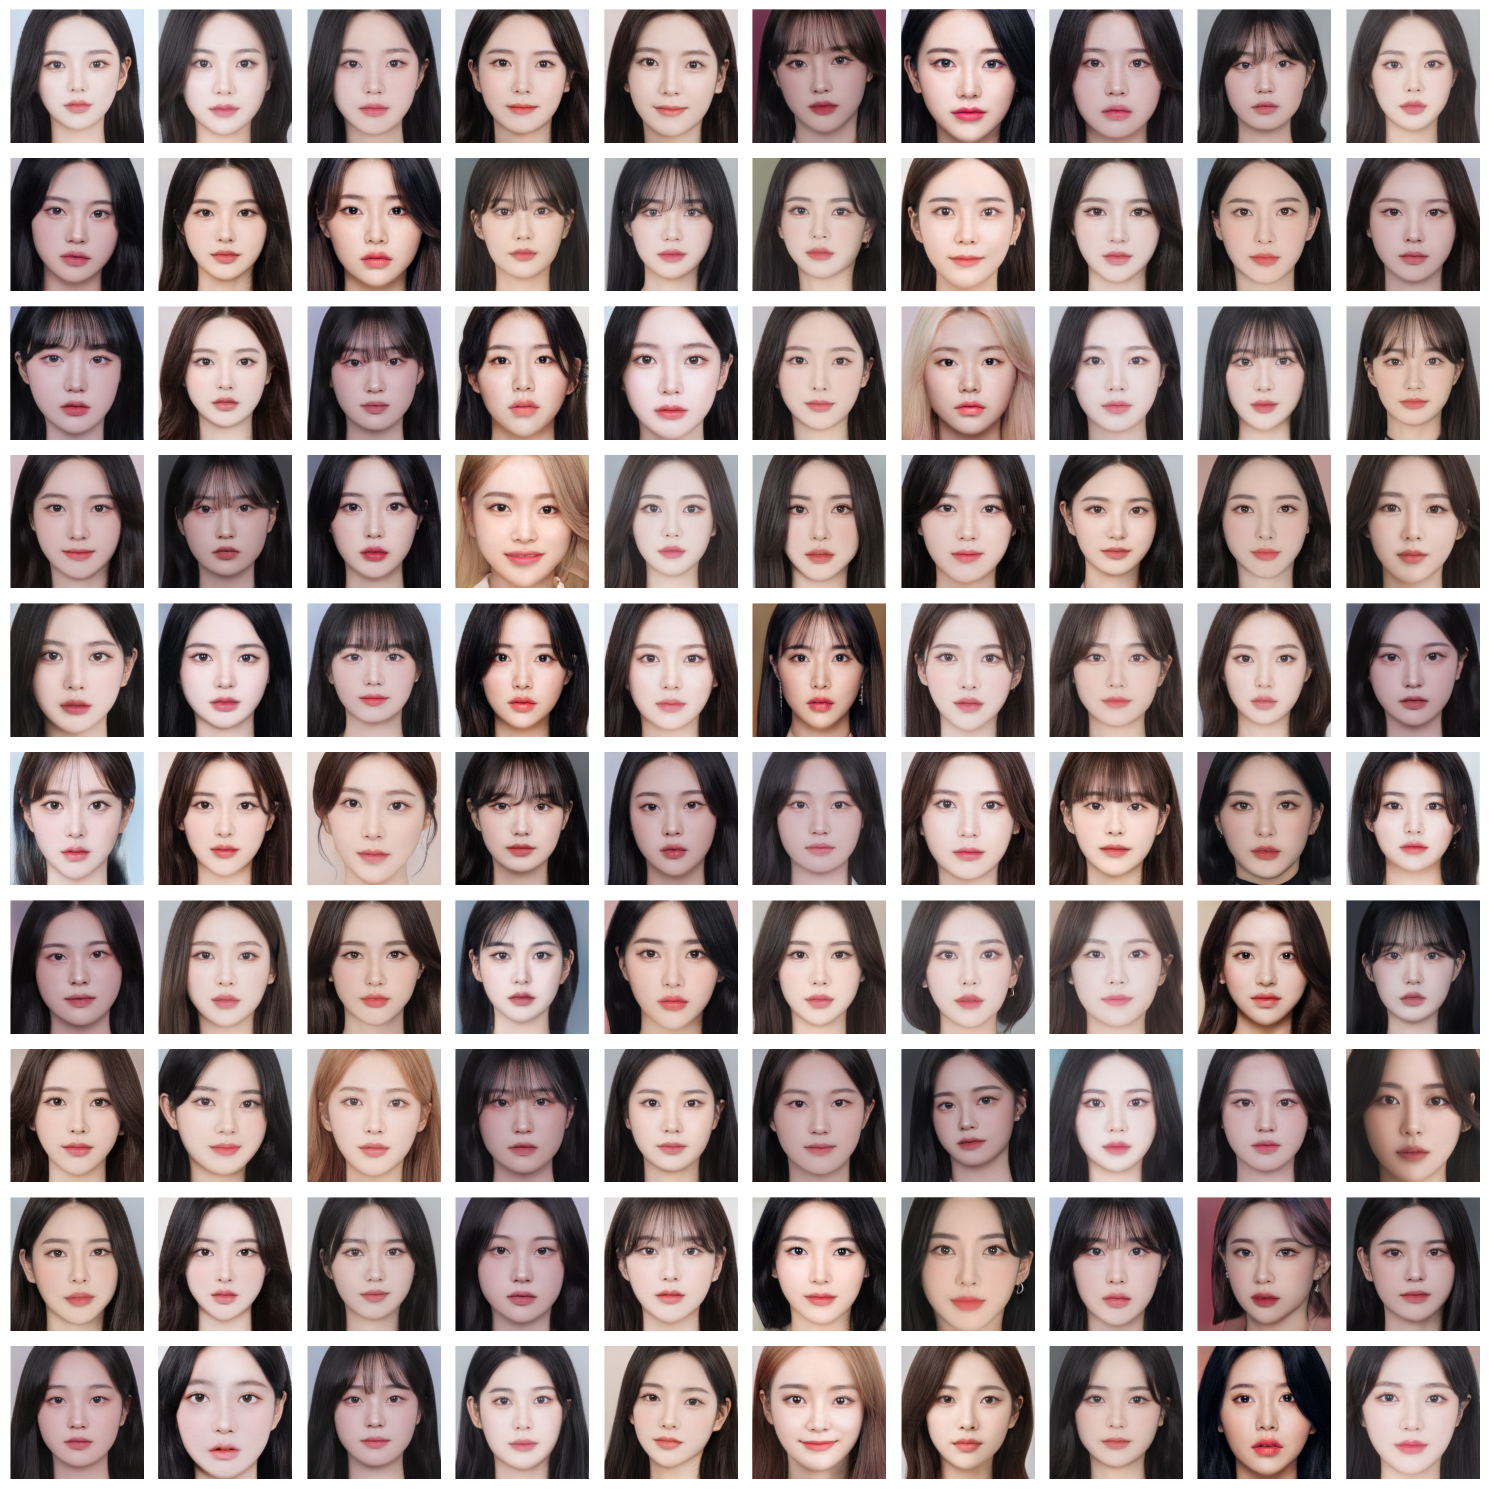

In [17]:
import matplotlib.pyplot as plt

# 결과 이미지가 저장된 디렉토리
image_dir = '../results'
image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]  # .png 파일만 선택

# 이미지 갯수 설정
num_images = min(len(image_files), 100)  # 최대 100장으로 제한
cols = 10  # 열 개수
rows = (num_images // cols) + (num_images % cols > 0)  # 필요한 행 개수 계산

# 서브플롯 생성
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 이미지 표시
for i in range(num_images):
    img_file = image_files[i]
    img_path = os.path.join(image_dir, img_file)
    img = plt.imread(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # 축 숨기기

# 남은 서브플롯 비우기
for j in range(num_images, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()